In [1]:
import pandas as pd
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

import matplotlib.pyplot as plt

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bendgame/JerkyNotebook/master/jerky.csv')
df.head()

,descriptionID,jerkyID,manufactureDescription,brand,flavor,smoked,protein,calories,gluten free,exotic,sweet,hot,sweetSpicy,teriyaki,original,Peppered,koreanBBQ,honeyGlazed,sodium,chewy,soft,tough,moist,dry,thick,thin,grade,cost,jerkyID.1
0,1,1,Featuring only premium steak with a robust fla...,Cattlemans Cut,Original,0,10,70,0,0,0,0,0,0,1,0,0,0,570,1,0,1,0,1,1,0,NaN,NaN,1
1,2,2,"When you start with slow-cooked premium steak,...",Cattlemans Cut,peppered,0,10,70,0,0,0,1,0,0,0,1,0,0,520,1,0,1,0,1,1,0,NaN,NaN,2
2,3,3,By drenching our premium steak in a mixture of...,Cattlemans Cut,Teriyaki,0,10,70,0,0,0,0,0,1,0,0,0,0,530,1,0,1,0,0,0,0,NaN,NaN,3
3,4,4,FLANK STEAK JERKY There’s truly nothing on ear...,Cattlemans Cut,Texas Style,0,10,100,0,1,0,0,0,0,1,0,0,0,510,1,0,1,0,0,0,1,NaN,NaN,4
4,5,5,REAL STEAK JERKY ORIGINAL RECIPE Some steaks c...,Chefs Cut,Original,0,10,90,1,0,0,0,0,0,1,0,0,0,340,1,1,0,1,0,1,0,NaN,NaN,5


In [7]:
import re

In [3]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [10]:
words = basic_clean(''.join(str(df['manufactureDescription'].tolist())))

In [12]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
bigrams_series

(beef, jerky)        37
(brown, sugar)        8
(hardwood, smoke)     7
(steak, strip)        7
(steak, jerky)        7
(black, pepper)       6
(beef, steak)         6
(real, steak)         6
(real, hardwood)      5
(soy, sauce)          5
(filet, mignon)       5
(meat, real)          5
dtype: int64

In [13]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]
trigrams_series

(beef, steak, strip)           6
(real, hardwood, smoke)        5
(meat, real, hardwood)         5
(teriyaki, beef, jerky)        5
(real, steak, jerky)           5
(hardwood, smoke, seasoned)    4
(traditional, style, jerky)    4
(given, added, hormone)        3
(flavored, beef, jerky)        3
(simply, crafted, simple)      3
(made, certified, organic)     3
(beef, jerky, glutenfree)      3
dtype: int64

Text(0.5, 0, '# of Occurances')

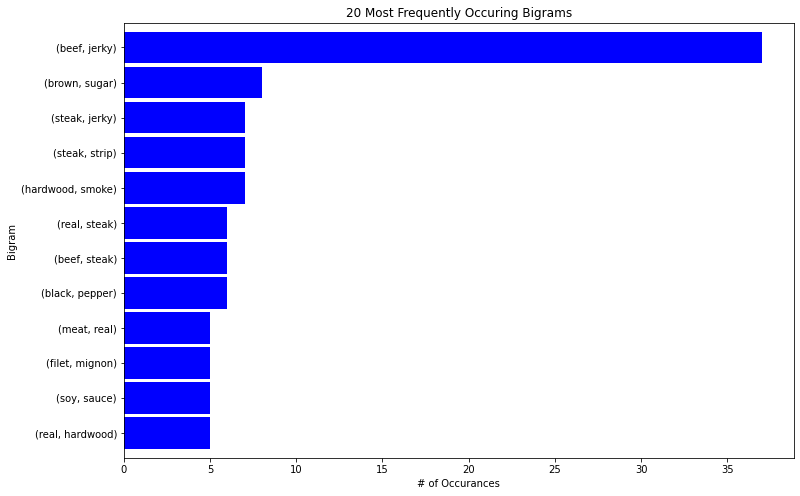

In [15]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')